# About Dataset

## Context
The current industrial trend regarding automatisms and regarding industrial plants leads us towards systems more and more complex mechatronics, working in an uncertain, evolutionary environment. It is so necessary to develop a diagnosis module to detect a fault (Fault Detection) that may affect the operation of these systems and to locate their causes (Fault Isolation). Therefore, a diagnosis module is needed to improve the performance and productivity of systems and limit the consequences of failures that can be catastrophic on human goods and life.

## Content
Time series of measurements on sensors uniquely identified by a Sensor Id. During the serie of measurement the sensor is disconnected or on failure.

This Dataset is aimed to serve the Fault detection Analytic component.

SensorID = 1 = PT100 temperature sensor, in an industrial environment, with dust & vibrations
Themes : Plant, Building, Power, IT, Machine
Keywords : Operational, Meters & sensors, Ambient, Electrical, per minute, over months
Modified: March 7, 2018

## Acknowledgements
The Publisher of this dataset is Schneider-Electric.

## Inspiration
Diagnosis consists of detecting abnormal functioning from sensor data. These data may be noisy or corrupt due to unpredictable events. That abnormal operation may be a failure of process equipment (a sensor, actuator or a component), control system failure (due to operator error or cyber-attack of
the system), or change of environment for example resources that are lacking (unavailable operators, exhausted stocks, etc.), or change due to non-conformity product etc. After detecting abnormal functioning, the cause can then be located and identified to make decisions (corrective actions or
reconfiguration of the system). The different type of faultsin the process is illustrated

The application of IoT systems in industries creates a huge amount of data. In addition, these industrial systems have become more and more complex and it is difficult to obtain an analytical model of the system. In this context, the use of ML tools comes out obvious and logic to cope with the challenges of
diagnosis in these systems. The goal of this dataset is to apply through several methods, the application of ML techniques on fault detection and diagnosis
problems. Among the machine learning techniques(may be traditional) , there are Support Vector Machine (SVM), Artificial Neural Network (ANN), Fuzzy
Neural Network (FNN), Decision Trees (DT), Bayesian Network (BN).

It could be a great idea to apply novel Deep Learning algorithms on this dataset such as:

Denoising stacked auto-encode and Long Short-Term Memory Network
Self-Attentive Convolutional Neural Networks
Some references:
https://arxiv.org/pdf/2006.13380.pdf
https://www.sciencedirect.com/science/article/abs/pii/S0020025520308422
https://reader.elsevier.com/reader/sd/pii/S0306261920308114?token=1675928516A34730661B0C6A35207B4AB4BECC82512AC9C5A4F09E0D5395594AA636FF55A3BDE3206452AE185E61951B

link : https://www.kaggle.com/datasets/arashnic/sensor-fault-detection-data

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../DataBases/Public Industrial Datasets/Sensor Fault Detection/sensor-fault-detection.csv',sep =';',parse_dates=['Timestamp'])

In [30]:
print(df.head())

                  Timestamp  SensorId      Value
0 2017-03-01 23:20:00+03:00         1  18.479807
1 2017-03-02 04:00:00+03:00         1  19.539112
2 2017-03-23 06:25:00+03:00         1  19.250198
3 2017-03-23 19:35:00+03:00         1  18.961285
4 2017-04-04 15:10:00+03:00         1  25.321623


In [31]:
df.describe()

,SensorId,Value
count,62629.0,62629.000000
mean,1.0,24.203861
std,0.0,5.411599
min,1.0,6.886155
25%,1.0,21.369419
50%,1.0,24.550188
75%,1.0,27.443794
max,1.0,149.601822


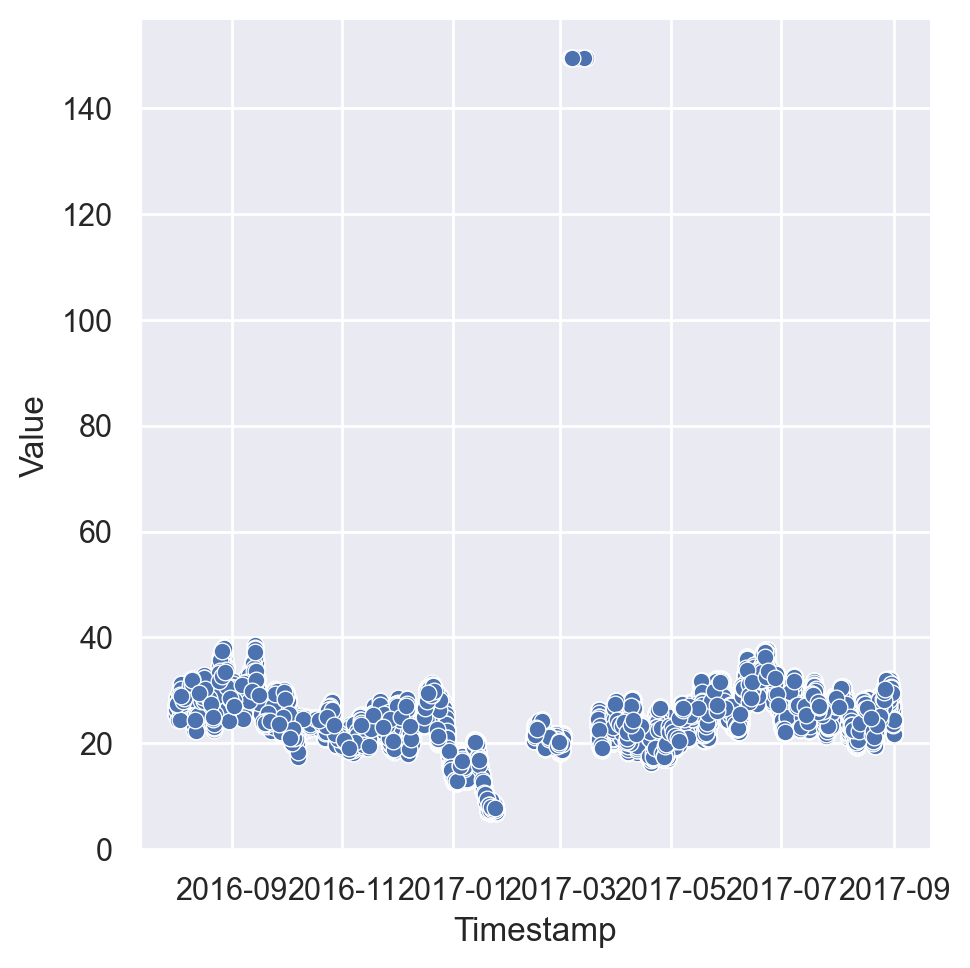

In [32]:
# Max value looks like an outlier according to mean and distribution
# let's check it out
sns.set_theme(style="darkgrid")

sns.relplot(data=df,x='Timestamp',y='Value')
plt.grid(True)
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200
plt.show()
%matplotlib inline

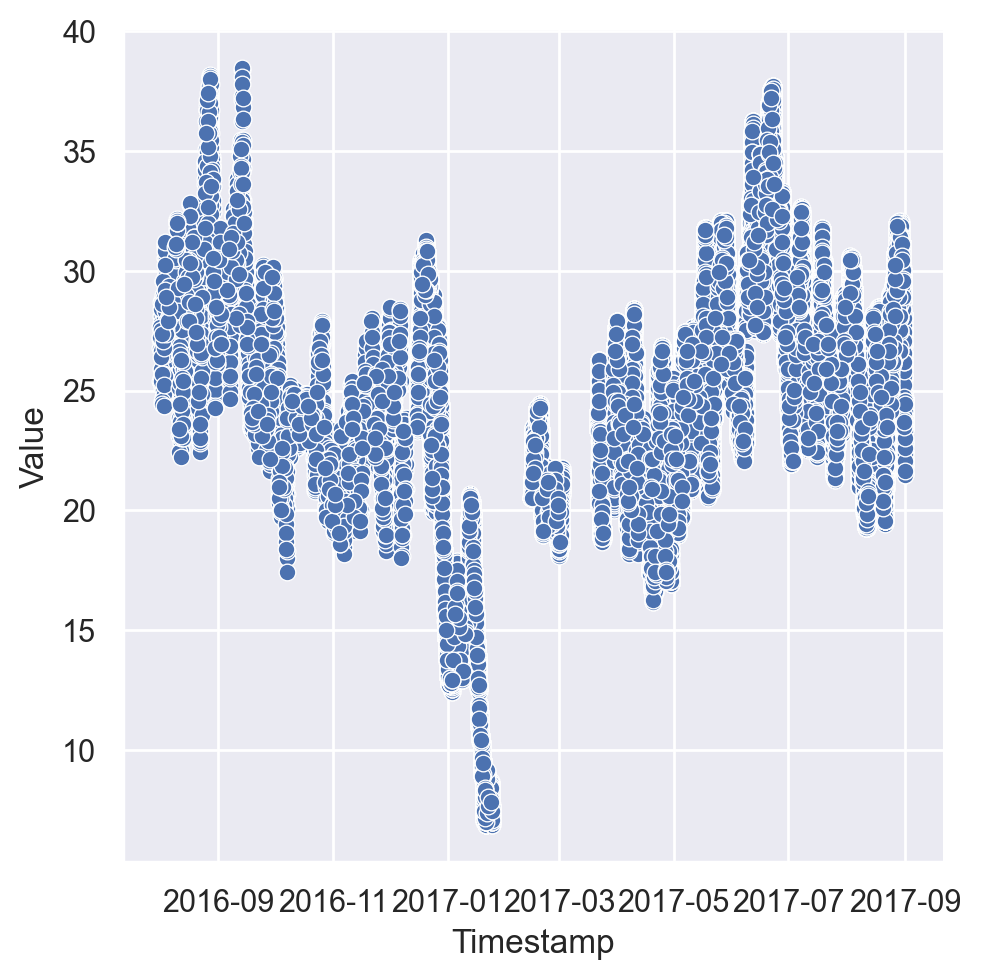

In [34]:
df = df[df['Value'] < 40]

sns.relplot(data=df,x='Timestamp',y='Value')
plt.grid(True)
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['figure.dpi'] = 200
plt.show()


In [35]:
df['quantile_high'] = df['Value'].quantile(.99)
df['quantile_low'] = df['Value'].quantile(.1)

print(df['quantile_high'][0])
print(df['quantile_low'][0])

35.26742554
17.5170269


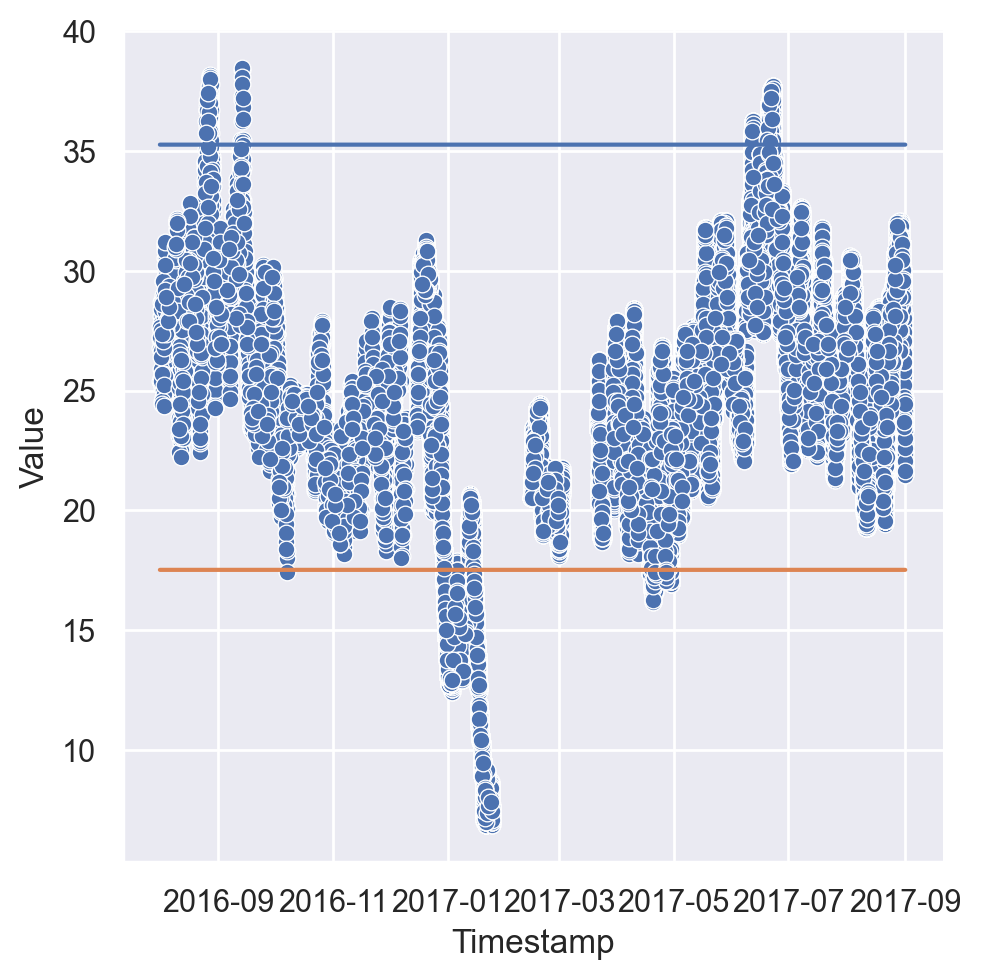

In [36]:
sns.relplot(data=df,x='Timestamp',y='Value')
sns.lineplot(data=df,x='Timestamp',y='quantile_high')
sns.lineplot(data=df,x='Timestamp',y='quantile_low')
plt.grid(True)
plt.show()

In [37]:
# Facilites using sensors generally using H (high), HH(high, high), L (low) and LL (low,low) level indicators
# to alarm an outlier point, this is a good example of it. Points below 17.50 can be considered LL 
# and points beyond 25.26 can be considered HH alarm with the given amount of data
# Actually we can always use this method to any equipment specific data. Because all equipments have their own
# behaviors according to location, temperature, pressure etc. even when they are identical. 

# The important point here is to look at the graph first and making decision about the steps on what we see.
# (filtering obvious points out then quantile the remaning)
# so what we can do here, we can write a simple script for incoming live data (probably reading as serial data)